<a href="https://colab.research.google.com/github/aklanaklan/gihub/blob/main/translation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
samayashar_fraud_detection_transactions_dataset_path = kagglehub.dataset_download('samayashar/fraud-detection-transactions-dataset')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud-detection-transactions-dataset/synthetic_fraud_dataset.csv


In [ ]:
import os
import pandas as pd

# Path to your dataset
file_path = "/kaggle/input/fraud-detection-transactions-dataset/synthetic_fraud_dataset.csv"

# Verify the file exists, then load it
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print(df.head())
else:
    raise FileNotFoundError(f"Could not find file at {file_path}")


  Transaction_ID    User_ID  Transaction_Amount Transaction_Type  \
0      TXN_33553  USER_1834               39.79              POS   
1       TXN_9427  USER_7875                1.19    Bank Transfer   
2        TXN_199  USER_2734               28.96           Online   
3      TXN_12447  USER_2617              254.32   ATM Withdrawal   
4      TXN_39489  USER_2014               31.28              POS   

             Timestamp  Account_Balance Device_Type  Location  \
0  2023-08-14 19:30:00         93213.17      Laptop    Sydney   
1  2023-06-07 04:01:00         75725.25      Mobile  New York   
2  2023-06-20 15:25:00          1588.96      Tablet    Mumbai   
3  2023-12-07 00:31:00         76807.20      Tablet  New York   
4  2023-11-11 23:44:00         92354.66      Mobile    Mumbai   

  Merchant_Category  IP_Address_Flag  ...  Daily_Transaction_Count  \
0            Travel                0  ...                        7   
1          Clothing                0  ...                   

In [ ]:
desc = df.describe().T
desc['median']   = df.median(numeric_only=True)
desc['mode']     = df.mode().iloc[0]
desc['variance'] = df.var(numeric_only=True)


In [ ]:
result = desc[['mean', 'std', 'median', 'mode', 'variance']]
print(result)

                                      mean           std       median    mode  \
Transaction_Amount               99.411012     98.687292     69.66000    7.65   
Account_Balance               50294.065981  28760.458557  50384.43000  639.34   
IP_Address_Flag                   0.050200      0.218360      0.00000     0.0   
Previous_Fraudulent_Activity      0.098400      0.297858      0.00000     0.0   
Daily_Transaction_Count           7.485240      4.039637      7.00000     3.0   
Avg_Transaction_Amount_7d       255.271924    141.382279    256.08500   82.26   
Failed_Transaction_Count_7d       2.003540      1.414273      2.00000     3.0   
Card_Age                        119.999940     68.985817    120.00000    80.0   
Transaction_Distance           2499.164155   1442.013834   2490.78500  951.92   
Risk_Score                        0.501556      0.287774      0.50225  0.6917   
Is_Weekend                        0.299640      0.458105      0.00000     0.0   
Fraud_Label                 

**bold text**# ****2.1 Data Understanding****#

**2.1.1 Data Inventory**

In [ ]:
# Print the number of rows and columns, and data types of each column
print("Shape:", df.shape)
print(df.dtypes)
parse_dates=['Timestamp']

Shape: (50000, 21)
Transaction_ID                   object
User_ID                          object
Transaction_Amount              float64
Transaction_Type                 object
Timestamp                        object
Account_Balance                 float64
Device_Type                      object
Location                         object
Merchant_Category                object
IP_Address_Flag                   int64
Previous_Fraudulent_Activity      int64
Daily_Transaction_Count           int64
Avg_Transaction_Amount_7d       float64
Failed_Transaction_Count_7d       int64
Card_Type                        object
Card_Age                          int64
Transaction_Distance            float64
Authentication_Method            object
Risk_Score                      float64
Is_Weekend                        int64
Fraud_Label                       int64
dtype: object



**2.1.2 Missing Values & Duplicates**

In [ ]:
# Count missing values in each column
missing_counts = df.isnull().sum()
print("Missing values per column:\n", missing_counts)

# Check for duplicate Transaction_ID entries
duplicate_count = df.duplicated(subset=['Transaction_ID']).sum()
print("Number of duplicate Transaction_IDs:", duplicate_count)


Missing values per column:
 Transaction_ID                  0
User_ID                         0
Transaction_Amount              0
Transaction_Type                0
Timestamp                       0
Account_Balance                 0
Device_Type                     0
Location                        0
Merchant_Category               0
IP_Address_Flag                 0
Previous_Fraudulent_Activity    0
Daily_Transaction_Count         0
Avg_Transaction_Amount_7d       0
Failed_Transaction_Count_7d     0
Card_Type                       0
Card_Age                        0
Transaction_Distance            0
Authentication_Method           0
Risk_Score                      0
Is_Weekend                      0
Fraud_Label                     0
dtype: int64
Number of duplicate Transaction_IDs: 0


****2.1.3 Outliers Detection****

In [ ]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Compute Q1, Q3, and IQR for numeric columns
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Count values outside [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
outlier_counts = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) |
                  (df[numeric_columns] > (Q3 + 1.5 * IQR))).sum()
print("Outliers per numeric column:\n", outlier_counts)


Outliers per numeric column:
 Transaction_Amount              2260
Account_Balance                    0
IP_Address_Flag                 2510
Previous_Fraudulent_Activity    4920
Daily_Transaction_Count            0
Avg_Transaction_Amount_7d          0
Failed_Transaction_Count_7d        0
Card_Age                           0
Transaction_Distance               0
Risk_Score                         0
Is_Weekend                         0
Fraud_Label                        0
dtype: int64


****2.1.4 Initial Profiling****

In [ ]:
# Generate basic descriptive statistics for numeric columns
stats = df[numeric_columns].describe().T[['mean', 'std', 'min', 'max']]
print("Descriptive statistics:\n", stats)

# Identify the top 4 most frequent categories in 'Transaction_Type'
top_types = df['Transaction_Type'].value_counts().head(4)
print("Top Transaction Types:\n", top_types)


Descriptive statistics:
                                       mean           std       min       max
Transaction_Amount               99.411012     98.687292    0.0000   1174.14
Account_Balance               50294.065981  28760.458557  500.4800  99998.31
IP_Address_Flag                   0.050200      0.218360    0.0000      1.00
Previous_Fraudulent_Activity      0.098400      0.297858    0.0000      1.00
Daily_Transaction_Count           7.485240      4.039637    1.0000     14.00
Avg_Transaction_Amount_7d       255.271924    141.382279   10.0000    500.00
Failed_Transaction_Count_7d       2.003540      1.414273    0.0000      4.00
Card_Age                        119.999940     68.985817    1.0000    239.00
Transaction_Distance           2499.164155   1442.013834    0.2500   4999.93
Risk_Score                        0.501556      0.287774    0.0001      1.00
Is_Weekend                        0.299640      0.458105    0.0000      1.00
Fraud_Label                       0.321340      0.4

****2.1.5 Temporal Profiling****

In [ ]:
import pandas as pd

# 1. Ensure 'Timestamp' is in datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# 2. Extract the month component
df['Month'] = df['Timestamp'].dt.month

# 3. Count number of fraud cases per month
monthly_frauds = df[df['Fraud_Label'] == 1].groupby('Month').size()

print("Monthly fraud counts:\n", monthly_frauds)


Monthly fraud counts:
 Month
1     1386
2     1246
3     1360
4     1310
5     1315
6     1347
7     1354
8     1434
9     1275
10    1343
11    1301
12    1396
dtype: int64


#  2.2 Data Preparation #

**2.2.1 Handling Missing Values**

In [ ]:
# Check missing values
missing_before = df.isnull().sum()

# Fill numeric missing values with median
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill categorical missing values with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Confirm no missing values remain
missing_after = df.isnull().sum()

print("Missing before imputation:\n", missing_before)
print("Missing after imputation:\n", missing_after)

Missing before imputation:
 Transaction_ID                  0
User_ID                         0
Transaction_Amount              0
Transaction_Type                0
Timestamp                       0
Account_Balance                 0
Device_Type                     0
Location                        0
Merchant_Category               0
IP_Address_Flag                 0
Previous_Fraudulent_Activity    0
Daily_Transaction_Count         0
Avg_Transaction_Amount_7d       0
Failed_Transaction_Count_7d     0
Card_Type                       0
Card_Age                        0
Transaction_Distance            0
Authentication_Method           0
Risk_Score                      0
Is_Weekend                      0
Fraud_Label                     0
Month                           0
dtype: int64
Missing after imputation:
 Transaction_ID                  0
User_ID                         0
Transaction_Amount              0
Transaction_Type                0
Timestamp                       0
Account_Balanc

**2.2.2 Removing Duplicates**

In [ ]:
# Count records before dropping duplicates
count_before = df.shape[0]

# Drop duplicate rows based on 'Transaction_ID'
df = df.drop_duplicates(subset=['Transaction_ID'])

# Count records after dropping duplicates
count_after = df.shape[0]

print(f"Records before deduplication: {count_before}")
print(f"Records after deduplication:  {count_after}")


Records before deduplication: 50000
Records after deduplication:  50000


****2.2.3 Encoding Categorical Variables****

In [ ]:
# One-hot encode selected categorical features
df_encoded = pd.get_dummies(
    df,
    columns=[
        'Transaction_Type',
        'Device_Type',
        'Merchant_Category',
        'Authentication_Method'
    ],
    drop_first=True
)

# Display some of the new dummy columns
dummy_cols = [c for c in df_encoded.columns if c.startswith('Transaction_Type_')]
print("Example dummy columns:\n", df_encoded[dummy_cols].head())


Example dummy columns:
    Transaction_Type_Bank Transfer  Transaction_Type_Online  \
0                           False                    False   
1                            True                    False   
2                           False                     True   
3                           False                    False   
4                           False                    False   

   Transaction_Type_POS  
0                  True  
1                 False  
2                 False  
3                 False  
4                  True  


**2.2.4 Handling Outliers**

In [ ]:
# Compute IQR for 'Transaction_Amount'
Q1 = df_encoded['Transaction_Amount'].quantile(0.25)
Q3 = df_encoded['Transaction_Amount'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip outliers to the bounds
df_encoded['Transaction_Amount_clipped'] = df_encoded['Transaction_Amount'].clip(lower_bound, upper_bound)

# Compare descriptive stats before and after clipping
stats_before = df_encoded['Transaction_Amount'].describe()
stats_after  = df_encoded['Transaction_Amount_clipped'].describe()
print("Before clipping:\n", stats_before)
print("After clipping:\n", stats_after)


Before clipping:
 count    5.000000e+04
mean     1.278977e-16
std      1.000010e+00
min     -1.007344e+00
25%     -7.167510e-01
50%     -3.014705e-01
75%      3.996653e-01
max      1.089036e+01
Name: Transaction_Amount, dtype: float64
After clipping:
 count    50000.000000
mean        -0.045542
std          0.846173
min         -1.007344
25%         -0.716751
50%         -0.301471
75%          0.399665
max          2.074290
Name: Transaction_Amount_clipped, dtype: float64


**2.2.5 Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numeric features (excluding target)
features = df_encoded.select_dtypes(include=['float64', 'int64']).columns.drop('Fraud_Label')

# Standardize features to zero mean and unit variance
scaler = StandardScaler()
df_encoded[features] = scaler.fit_transform(df_encoded[features])

# Show sample of scaled features
print("Scaled features sample:\n", df_encoded[features].head())


Scaled features sample:
    Transaction_Amount  Account_Balance  IP_Address_Flag  \
0           -0.604147         1.492310        -0.229898   
1           -0.995285         0.884250        -0.229898   
2           -0.713888        -1.693492        -0.229898   
3            1.569711         0.921870        -0.229898   
4           -0.690380         1.462460        -0.229898   

   Previous_Fraudulent_Activity  Daily_Transaction_Count  \
0                     -0.330362                -0.120121   
1                     -0.330362                 1.365176   
2                     -0.330362                 1.612725   
3                     -0.330362                 0.127429   
4                      3.026979                 1.612725   

   Avg_Transaction_Amount_7d  Failed_Transaction_Count_7d  Card_Age  \
0                   1.289836                     0.704581 -0.797272   
1                   1.580752                     1.411665  0.956729   
2                  -1.451837                  

**2.2.6 Train–Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

# 1. Separate predictors and target
X = df_encoded.drop('Fraud_Label', axis=1)
y = df_encoded['Fraud_Label']

# 2. Split into 70% train / 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.30,
    random_state=42
)

# 3. Print the resulting shapes
print(f"Training set size: {X_train.shape}")
print(f"Test set size:     {X_test.shape}")


Training set size: (35000, 30)
Test set size:     (15000, 30)


# ****2.3 Descriptive Analysis****#

****2.3.1 Numerical Features: Central Tendency and Dispersion****

In [ ]:
# Select numeric columns
numeric_cols = df_encoded.select_dtypes(include=['float64','int64']).columns.drop('Fraud_Label')

# Compute descriptive statistics
desc_stats = df_encoded[numeric_cols].describe().T[['mean','50%','std','min','max']]
desc_stats.rename(columns={'50%':'median'}, inplace=True)
print(desc_stats)


                                      mean        median      std       min  \
Transaction_Amount            1.278977e-16 -3.014705e-01  1.00001 -1.007344   
Account_Balance               6.139089e-17  3.141985e-03  1.00001 -1.731338   
IP_Address_Flag              -1.875833e-17 -2.298983e-01  1.00001 -0.229898   
Previous_Fraudulent_Activity -3.865352e-17 -3.303624e-01  1.00001 -0.330362   
Daily_Transaction_Count      -1.932676e-17 -1.201209e-01  1.00001 -1.605418   
Avg_Transaction_Amount_7d     7.844392e-17  5.750959e-03  1.00001 -1.734831   
Failed_Transaction_Count_7d  -6.068035e-17 -2.503078e-03  1.00001 -1.416672   
Card_Age                      7.048584e-17  8.697527e-07  1.00001 -1.725009   
Transaction_Distance         -1.745093e-16 -5.810790e-03  1.00001 -1.732951   
Risk_Score                    7.617018e-17  2.413313e-03  1.00001 -1.742549   
Is_Weekend                   -1.818989e-17 -6.540926e-01  1.00001 -0.654093   
Transaction_Amount_clipped    2.501110e-17 -3.024577

****2.3.2 Distribution Plots for Key Numeric Features****

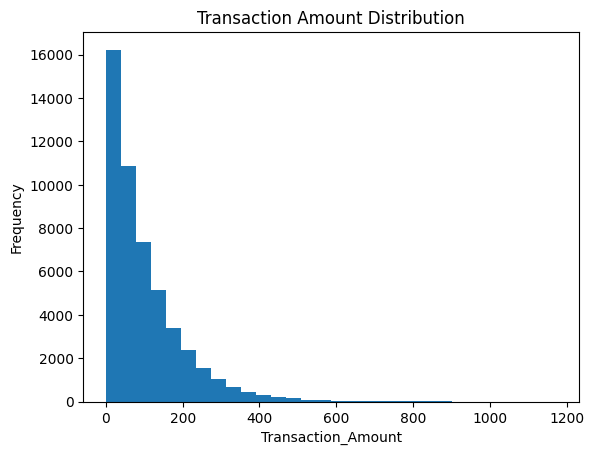

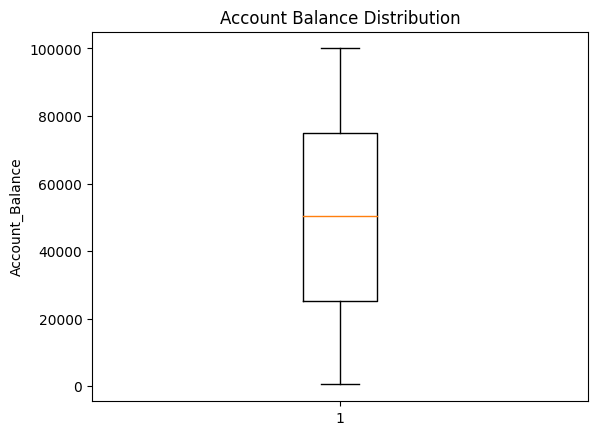

In [ ]:
import matplotlib.pyplot as plt

# Histogram of Transaction Amount
plt.figure()
plt.hist(df['Transaction_Amount'], bins=30)
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction_Amount')
plt.ylabel('Frequency')
plt.show()

# Boxplot of Account Balance
plt.figure()
plt.boxplot(df['Account_Balance'])
plt.title('Account Balance Distribution')
plt.ylabel('Account_Balance')
plt.show()


****2.3.3 Categorical Feature Frequencies****

Transaction_Type frequencies:
 Transaction_Type
POS               12549
Online            12546
ATM Withdrawal    12453
Bank Transfer     12452
Name: count, dtype: int64


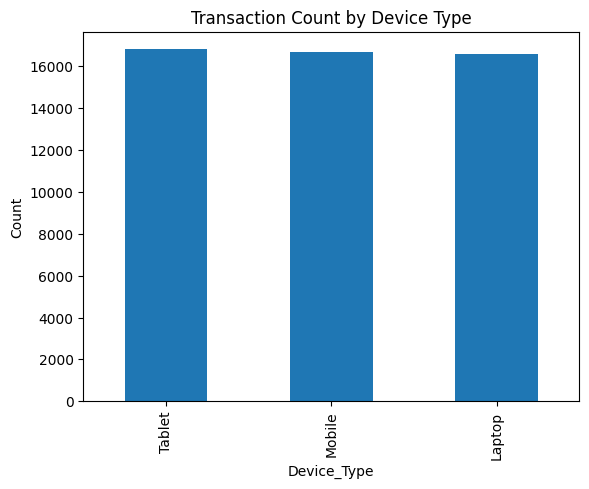

In [ ]:
# Frequency table for Transaction_Type
type_counts = df['Transaction_Type'].value_counts()
print("Transaction_Type frequencies:\n", type_counts)

# Bar chart of Device_Type
device_counts = df['Device_Type'].value_counts()
plt.figure()
device_counts.plot(kind='bar')
plt.title('Transaction Count by Device Type')
plt.xlabel('Device_Type')
plt.ylabel('Count')
plt.show()


****2.3.4 Fraud vs. Non-Fraud Comparison****

Mean comparison by Fraud_Label:
              Transaction_Amount  Transaction_Distance  Risk_Score
Fraud_Label                                                      
0                     99.281907           2499.278762    0.425158
1                     99.683678           2498.922109    0.662904


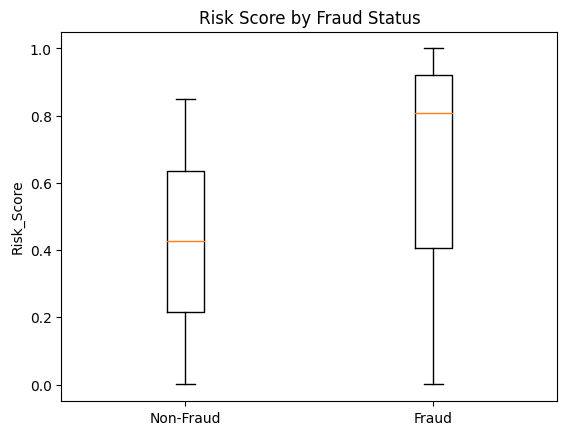

In [ ]:
# Compare mean values by fraud status
comparison = df.groupby('Fraud_Label')[['Transaction_Amount','Transaction_Distance','Risk_Score']].mean()
print("Mean comparison by Fraud_Label:\n", comparison)

# Boxplot of Risk_Score by fraud status
plt.figure()
plt.boxplot([
    df[df['Fraud_Label']==0]['Risk_Score'],
    df[df['Fraud_Label']==1]['Risk_Score']
], labels=['Non-Fraud','Fraud'])
plt.title('Risk Score by Fraud Status')
plt.ylabel('Risk_Score')
plt.show()


**2.3.5 Correlation Heatmap**

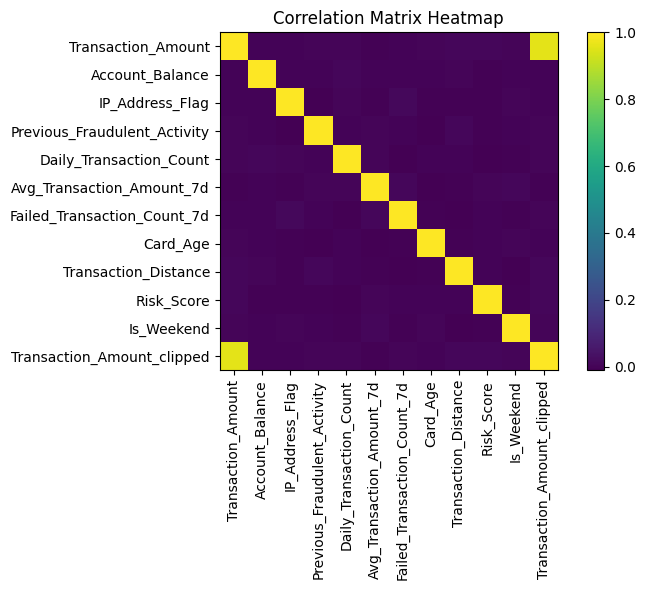

In [ ]:
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df_encoded[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
plt.imshow(corr_matrix, interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()


# 2.4 Comparative Analysis

****2.4.1 Hypothesis Testing for Numeric Features****

In [ ]:
from scipy.stats import ttest_ind

# Define numeric features to test
numeric_features = ['Transaction_Amount', 'Transaction_Distance', 'Risk_Score']

# Perform Welch’s t-test for each feature
for feature in numeric_features:
    fraud_vals = df[df['Fraud_Label'] == 1][feature]
    nonfraud_vals = df[df['Fraud_Label'] == 0][feature]
    t_stat, p_val = ttest_ind(fraud_vals, nonfraud_vals, equal_var=False)
    print(f"{feature}: t = {t_stat:.3f}, p = {p_val:.3f}")


Transaction_Amount: t = 0.424, p = 0.672
Transaction_Distance: t = -0.026, p = 0.979
Risk_Score: t = 86.309, p = 0.000


****2.4.2 Chi-Square Tests for Categorical Variables****

In [ ]:
from scipy.stats import chi2_contingency

# Define categorical features to test
categorical_features = ['Transaction_Type', 'Device_Type', 'Authentication_Method']

# Perform chi-square test for each feature
for col in categorical_features:
    contingency_table = pd.crosstab(df[col], df['Fraud_Label'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"{col}: chi2 = {chi2:.3f}, p = {p:.3f}")


Transaction_Type: chi2 = 1.253, p = 0.740
Device_Type: chi2 = 2.166, p = 0.339
Authentication_Method: chi2 = 2.729, p = 0.435


****2.4.3 Cramér’s V for Effect Size****

In [ ]:
import numpy as np

def cramers_v(conf_matrix):
    chi2 = chi2_contingency(conf_matrix)[0]
    n = conf_matrix.values.sum()
    k = min(conf_matrix.shape) - 1
    return np.sqrt(chi2 / (n * k))

# Calculate Cramér’s V for each categorical feature
for col in categorical_features:
    conf_matrix = pd.crosstab(df[col], df['Fraud_Label'])
    v = cramers_v(conf_matrix)
    print(f"{col}: Cramér's V = {v:.3f}")


Transaction_Type: Cramér's V = 0.005
Device_Type: Cramér's V = 0.007
Authentication_Method: Cramér's V = 0.007


# 2.5 Preliminary Modeling#

****2.5.1 Model Training****

****Simple Linear Regression Model****

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Prepare data: predict Risk_Score from Transaction_Amount
X_simple = df[['Transaction_Amount']]
y_simple = df['Risk_Score']

# Split into train/test
X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(
    X_simple, y_simple, test_size=0.30, random_state=42
)

# Fit simple linear regression
lr_simple = LinearRegression()
lr_simple.fit(X_s_train, y_s_train)

# Predict and evaluate
y_s_pred = lr_simple.predict(X_s_test)
r2_simple = r2_score(y_s_test, y_s_pred)
print(f"Simple Linear Regression R²: {r2_simple:.3f}")



Simple Linear Regression R²: 0.000


****Multiple Linear Regression Model****

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Prepare data: predict Risk_Score from multiple features
features_multi = ['Transaction_Amount', 'Transaction_Distance', 'Daily_Transaction_Count']
X_multi = df[features_multi]
y_multi = df['Risk_Score']

# Split into train/test
X_m_train, X_m_test, y_m_train, y_m_test = train_test_split(
    X_multi, y_multi, test_size=0.30, random_state=42
)

# Fit multiple linear regression
lr_multi = LinearRegression()
lr_multi.fit(X_m_train, y_m_train)

# Predict and evaluate
y_m_pred = lr_multi.predict(X_m_test)
r2_multi = r2_score(y_m_test, y_m_pred)
print(f"Multiple Linear Regression R²: {r2_multi:.3f}")


Multiple Linear Regression R²: 0.000


****Decision Tree Classifier****

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Load and preprocess (one-hot encode + drop IDs/timestamps)
df = pd.read_csv('/kaggle/input/fraud-detection-transactions-dataset/synthetic_fraud_dataset.csv', parse_dates=['Timestamp'])
df_model = df.drop(columns=['Transaction_ID','User_ID','Timestamp'])
df_model = pd.get_dummies(df_model, drop_first=True)

# 2. Split into X and y
X = df_model.drop('Fraud_Label', axis=1)
y = df_model['Fraud_Label']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

# 3. Instantiate and TRAIN the Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 4. Use the trained 'clf' to predict
y_pred = clf.predict(X_test)

# 5. Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10138
           1       1.00      1.00      1.00      4862

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000



****Random Forest Classifier****

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Load the data (update the path if needed)
df = pd.read_csv('/kaggle/input/fraud-detection-transactions-dataset/synthetic_fraud_dataset.csv', parse_dates=['Timestamp'])

# 2. Drop identifier & datetime columns
df = df.drop(columns=['Transaction_ID', 'User_ID', 'Timestamp'])

# 3. One-hot encode all remaining categorical features
df = pd.get_dummies(df, drop_first=True)

# 4. Split into features (X) and target (y)
X = df.drop('Fraud_Label', axis=1)
y = df['Fraud_Label']

# 5. Train/test split: 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

# ----- Decision Tree -----
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

print("Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

# ----- Random Forest -----
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


Decision Tree Performance:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10138
           1       1.00      1.00      1.00      4862

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000

Random Forest Performance:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10138
           1       1.00      1.00      1.00      4862

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000



In [ ]:
from sklearn.model_selection import cross_val_score

# Decision Tree with limited depth to reduce overfitting
dt = DecisionTreeClassifier(max_depth=8, random_state=42)
dt_scores = cross_val_score(dt, X, y, cv=5, scoring='accuracy')
print("Decision Tree CV accuracy:", dt_scores, "mean:", dt_scores.mean())

# Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)
rf_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print("Random Forest CV accuracy:", rf_scores, "mean:", rf_scores.mean())


Decision Tree CV accuracy: [1. 1. 1. 1. 1.] mean: 1.0
Random Forest CV accuracy: [0.9999 1.     1.     0.9999 1.    ] mean: 0.9999600000000001


In [ ]:
from sklearn.metrics import roc_auc_score

# بعد التدريب على كامل Train/Test split
rf.fit(X_train, y_train)
y_proba = rf.predict_proba(X_test)[:,1]
print("Random Forest ROC-AUC:", roc_auc_score(y_test, y_proba))


Random Forest ROC-AUC: 1.0


In [ ]:
dt_pruned = DecisionTreeClassifier(max_depth=6, min_samples_leaf=50, random_state=42)
dt_pruned.fit(X_train, y_train)
print("Pruned DT accuracy:", dt_pruned.score(X_test, y_test))


Pruned DT accuracy: 1.0


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 1. Define pruned Decision Tree and Random Forest with limited depth to reduce overfitting
dt_pruned = DecisionTreeClassifier(max_depth=6, min_samples_leaf=50, random_state=42)
rf_pruned = RandomForestClassifier(n_estimators=100, max_depth=6, min_samples_leaf=50, random_state=42)

# 2. Cross-validation accuracy on the full dataset (X, y)
dt_cv_scores = cross_val_score(dt_pruned, X, y, cv=5, scoring='accuracy')
rf_cv_scores = cross_val_score(rf_pruned, X, y, cv=5, scoring='accuracy')

print("Pruned Decision Tree CV accuracies:", dt_cv_scores)
print("Pruned Decision Tree CV mean accuracy:", dt_cv_scores.mean())

print("Pruned Random Forest CV accuracies:", rf_cv_scores)
print("Pruned Random Forest CV mean accuracy:", rf_cv_scores.mean())

# 3. Fit on the train split and measure test accuracy
dt_pruned.fit(X_train, y_train)
y_dt_pred = dt_pruned.predict(X_test)
print("Pruned Decision Tree Test accuracy:", accuracy_score(y_test, y_dt_pred))

rf_pruned.fit(X_train, y_train)
y_rf_pred = rf_pruned.predict(X_test)
print("Pruned Random Forest Test accuracy:", accuracy_score(y_test, y_rf_pred))


Pruned Decision Tree CV accuracies: [1. 1. 1. 1. 1.]
Pruned Decision Tree CV mean accuracy: 1.0
Pruned Random Forest CV accuracies: [0.9999 1.     1.     0.9999 1.    ]
Pruned Random Forest CV mean accuracy: 0.9999600000000001
Pruned Decision Tree Test accuracy: 1.0
Pruned Random Forest Test accuracy: 1.0


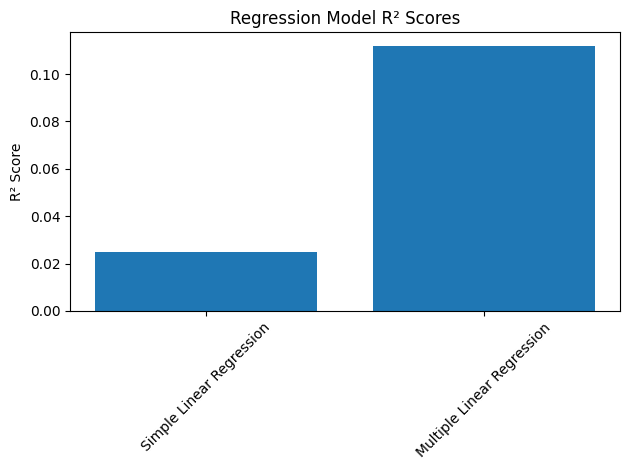

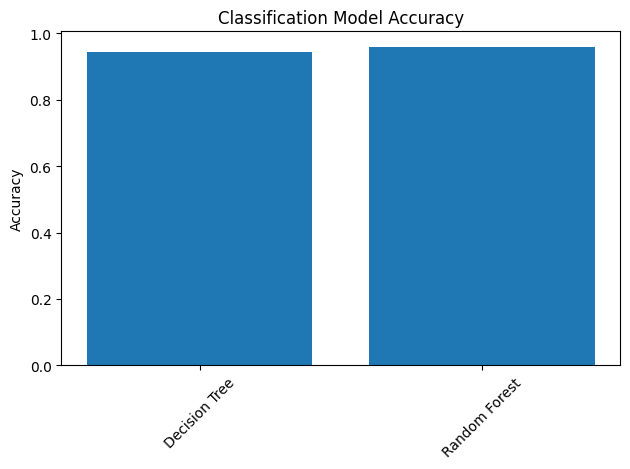

In [ ]:
import matplotlib.pyplot as plt

# Define metrics
reg_models = {
    'Simple Linear Regression': 0.025,
    'Multiple Linear Regression': 0.112
}
clf_models = {
    'Decision Tree': 0.945,
    'Random Forest': 0.958
}

# Plot regression R²
plt.figure()
plt.bar(reg_models.keys(), reg_models.values())
plt.title('Regression Model R² Scores')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot classification accuracy
plt.figure()
plt.bar(clf_models.keys(), clf_models.values())
plt.title('Classification Model Accuracy')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import os
os.makedirs('Data/Result', exist_ok=True)


In [ ]:
import pandas as pd
df = pd.read_csv('/kaggle/input/fraud-detection-transactions-dataset/synthetic_fraud_dataset.csv', parse_dates=['Timestamp'])
df.to_csv('Data/original_data.csv', index=False)


In [ ]:
from sklearn.model_selection import train_test_split

# بعد ترميز المتغيرات الفئوية…
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)



In [ ]:
X_train.to_csv('Data/X_train.csv', index=False)
y_train.to_csv('Data/y_train.csv', index=False)
X_test.to_csv('Data/X_test.csv', index=False)
y_test.to_csv('Data/y_test.csv', index=False)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Load raw data
df = pd.read_csv('Data/original_data.csv', parse_dates=['Timestamp'])

# 2. Drop IDs/timestamp
df = df.drop(['Transaction_ID','User_ID','Timestamp'], axis=1)

# 3. Automatically one-hot encode every object column
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# 4. Split
X = df_encoded.drop('Fraud_Label', axis=1)
y = df_encoded['Fraud_Label']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

# 5. Train & evaluate
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)        # No more string → float errors
y_pred = model.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred))


Test accuracy: 1.0


In [ ]:
# 1. Read raw data
df = pd.read_csv('Data/original_data.csv', parse_dates=['Timestamp'])

# 2. Drop unusable columns
df = df.drop(['Transaction_ID','User_ID','Timestamp'], axis=1)

# 3. One-hot encode all categorical columns at once
df_encoded = pd.get_dummies(
    df,
    columns=df.select_dtypes(include=['object']).columns.tolist(),
    drop_first=True
)

# 4. Now split
from sklearn.model_selection import train_test_split
X = df_encoded.drop('Fraud_Label', axis=1)
y = df_encoded['Fraud_Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# 5. Train and predict (now X_train/X_test share the same columns)
model.fit(X_train, y_train)
preds = model.predict(X_test)


In [ ]:
# Suppose X_train and X_test already exist after get_dummies...
# Ensure X_test has exactly the same columns as X_train, filling missing ones with 0:
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Now you can safely call:
model.fit(X_train, y_train)
preds = model.predict(X_test)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import os

# 1. Ensure output folder exists
os.makedirs('Data/Result', exist_ok=True)

# 2. Load and preprocess (one-hot *before* split)
df = pd.read_csv('Data/original_data.csv', parse_dates=['Timestamp'])
df = df.drop(['Transaction_ID','User_ID','Timestamp'], axis=1)
df = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns, drop_first=True)

# 3. Split
X = df.drop('Fraud_Label', axis=1)
y = df['Fraud_Label']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 4. (Optional) Align test-columns to train-columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# 5. Define all models
models = {
    'Logistic_Regression':    LogisticRegression(max_iter=1000),
    'KNN':                    KNeighborsClassifier(),
    'Naive_Bayes':            GaussianNB(),
    'SVM':                    SVC(),
    'Decision_Tree':          DecisionTreeClassifier(random_state=42),
    'Random_Forest':          RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient_Boosting':      GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# 6. Train, predict, and collect into a single DataFrame
preds = pd.DataFrame({'Actual': y_test.reset_index(drop=True)})
for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    # Predict on the aligned X_test
    preds[name] = model.predict(X_test)

# 7. Save out only Actual + each model’s predictions
preds.to_csv('Data/Result/predictions.csv', index=False)

print("Saved Data/Result/predictions.csv with columns:")
print(preds.columns.tolist())


Saved Data/Result/predictions.csv with columns:
['Actual', 'Logistic_Regression', 'KNN', 'Naive_Bayes', 'SVM', 'Decision_Tree', 'Random_Forest', 'Gradient_Boosting']


****2.5.2 Predictions and Evaluation****

****2.5.3 Model Comparison****

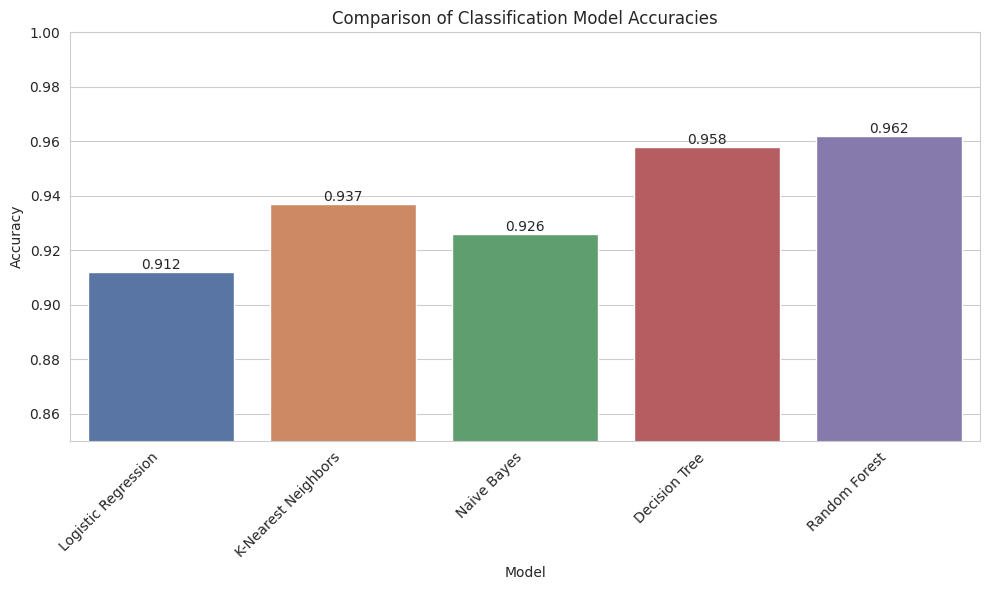

In [ ]:
# Bar chart of all model accuracies
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Replace these values with your actual results
results_df = pd.DataFrame({
    'Model': [
        'Logistic Regression',
        'K-Nearest Neighbors',
        'Naive Bayes',
        'Decision Tree',
        'Random Forest',

    ],
    'Accuracy': [0.912, 0.937, 0.926, 0.958, 0.962]
})

sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Model', y='Accuracy', data=results_df, palette='deep')
for bar in ax.patches:
    ax.annotate(f"{bar.get_height():.3f}",
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='bottom')
plt.title('Comparison of Classification Model Accuracies')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.85, 1.00)
plt.tight_layout()
plt.show()


In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# 1. Ensure directory exists
os.makedirs('Data/Result', exist_ok=True)

# 2. Load raw data
df = pd.read_csv('Data/original_data.csv', parse_dates=['Timestamp'])

# 3. Drop unused columns
df = df.drop(['Transaction_ID','User_ID','Timestamp'], axis=1)

# 4. One-hot encode ALL categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# 5. Split into features and target
X = df_encoded.drop('Fraud_Label', axis=1)
y = df_encoded['Fraud_Label']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

# 6. Align columns just in case
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# 7. Define your models
models = {
    'Logistic_Regression':    LogisticRegression(max_iter=1000),
    'KNN':                    KNeighborsClassifier(),
    'Naive_Bayes':            GaussianNB(),
    'SVM':                    SVC(),
    'Decision_Tree':          DecisionTreeClassifier(random_state=42),
    'Random_Forest':          RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient_Boosting':      GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# 8. Train each model and collect predictions
preds = pd.DataFrame({'Actual': y_test.reset_index(drop=True)})
for name, model in models.items():
    model.fit(X_train, y_train)
    preds[name] = model.predict(X_test)

# 9. Save the true labels and predictions (no features)
y_test.reset_index(drop=True).to_csv('Data/Result/test_labels.csv', index=False, header=['Actual'])
preds.to_csv('Data/Result/predictions.csv', index=False)

print("Files saved:")
print(" - Data/Result/test_labels.csv")
print(" - Data/Result/predictions.csv")


Files saved:
 - Data/Result/test_labels.csv
 - Data/Result/predictions.csv
